<a href="https://colab.research.google.com/github/cmalkan/i4Things/blob/main/i4Things.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem***
Can't find where things are kept in the house, they get lost.
## ***Solution***
An image detection system that can be used as to query items it sees... as it will have an eye for things (hence the project name "i4things")
###****Reference****
Code Reference Link: https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/

---



# Using Static Image Classification

STEP 1

In [ ]:
!pip install PyDrive
!pip install tensorflow
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#DS: fashion-mnist-master.zip (https://drive.google.com/file/d/1WsCPESzNj7Tlu6uKjhDlyUJqTCdanWrZ/view?usp=sharing)
download = drive.CreateFile({'id': '1WsCPESzNj7Tlu6uKjhDlyUJqTCdanWrZ'})
download.GetContentFile('fashion-mnist-master.zip')
!unzip fashion-mnist-master.zip
#!tar -xvf t10k-images-idx3-ubyte.gz

STEP 2


In [31]:
import tensorflow as tf
from tensorflow import keras #in TF2.0, Keras wrapper to TF is included
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#tf.compat.v1.logging.set_verbosity(tf.logging.ERROR) #only log error messages in TF

STEP 3 - all about the dataset

In [ ]:
#Load the data from Keras
from keras.datasets import cifar10
#x is the data, y is the label
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

index = 0

#print label names:
label_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
print('Y TRAIN!!! ',label_names[ y_train[index][0]])#label_names[y_train[index]])

#show type of array data
print(type(x_train))
print(type(y_train))

#Get the shape of array
#(num_samples, 32 /*xsize*/, 32 /*ysize*/, 3 /*RGB*/) -- if "channel last format"
print('Image Data Format is:',tf.keras.backend.image_data_format())
print('x_train shape:',x_train.shape)

#Take a look at the image
print('First img (',label_names[y_train[index][0]], '):',x_train[index],plt.imshow(x_train[index]))

#Covert Dataset to "One Hot" array to input into Neural Network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('One Hot Array:',y_train_one_hot, y_test_one_hot)

#Normalize Pixes to the values to be between 0 & 1
x_train = x_train / 255 #each pixel intensity is defined between 0-255, so 8-bit.
x_test = x_test / 255

#### Reading dataset from CSV file.
#train = pd.read_csv('train.csv')
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
#train_image = []
#for i in tqdm(range(train.shape[0])):
#    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
#    img = image.img_to_array(img)  # read img as array
#    img = img/255
#    train_image.append(img)  # Added it to array
#X = np.array(train_image)    # convert to np array - i.e. dense array with multiple values.
#y=train['label'].values
#y = to_categorical(y)

STEP 4 -Creating a validation set from training data

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

STEP 5

In [52]:
#Reference - good example - https://www.youtube.com/watch?v=cAICT4Al5Ow&t=1s
#Create Model Architecture
model = Sequential() # Since each layer will feed data to next layer.  Alternative would be a "Graph" layer
#Add 1st Layer
#model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
#filters = the dimensionality of the output space (i.e. the number of output filters in the convolution). 
#kernel_size = height and width of the 2D convolution window.
#convolution of the image against the known filter that presets a "high value"
#"relu" is "mod" for the image which changes all the negative values in the vector map to 0, to make it faster 
model.add(Conv2D(filters=32, kernel_size=(5, 5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 2nd Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
#maxpooling ... generalizes the matrix of 2,2 with the highest layer, to make the processing faster
model.add(MaxPooling2D(pool_size=(2, 2)))

#Add 4,5,6,7,8 layer
model.add(Flatten())
model.add(Dense(1000, activation='relu')) #it adds # of neurons... 1000
#dropout for preventing overfitting, so you take away (by 0'ing the output) of parameter (0.5) % of the "nodes"/pixes
model.add(Dropout(0.5))

model.add(Dense(500, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu')) 
model.add(Dense(10, activation='softmax')) #softmax converts into probabilites

#compile
model.compile(loss='categorical_crossentropy', #reference - https://www.tensorflow.org/api_docs/python/tf/keras/losses 
              optimizer='Adam', #reference - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam 
              metrics=['accuracy'])

STEP 6 - train the model

In [ ]:
hist = model.fit(x_train, #Input data
          y_train_one_hot, #Target data.
          batch_size=256, # Number of samples per gradient update.
          epochs=10, # Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 
          validation_split=0.2) #Fraction of the training data to be used as validation datasplit the data(20%) into validation from train data.
         

Epoch 1/10
157/157 [==============================] - 61s 385ms/step - loss: 1.9621 - accuracy: 0.2647 - val_loss: 1.4695 - val_accuracy: 0.4738
Epoch 2/10
157/157 [==============================] - 60s 383ms/step - loss: 1.3621 - accuracy: 0.4991 - val_loss: 1.2164 - val_accuracy: 0.5607
Epoch 3/10
157/157 [==============================] - 60s 383ms/step - loss: 1.1883 - accuracy: 0.5710 - val_loss: 1.1233 - val_accuracy: 0.6058
Epoch 4/10
157/157 [==============================] - 60s 384ms/step - loss: 1.0600 - accuracy: 0.6239 - val_loss: 1.0238 - val_accuracy: 0.6375
Epoch 5/10
157/157 [==============================] - 60s 381ms/step - loss: 0.9384 - accuracy: 0.6703 - val_loss: 0.9677 - val_accuracy: 0.6602
Epoch 6/10
157/157 [==============================] - 60s 382ms/step - loss: 0.8467 - accuracy: 0.7007 - val_loss: 1.0071 - val_accuracy: 0.6453
Epoch 7/10
157/157 [==============================] - 60s 381ms/step - loss: 0.7756 - accuracy: 0.7279 - val_loss: 0.9171 - val_ac

Evalute & plot the Module using test data

313/313 [==============================] - 6s 19ms/step - loss: 1.1633 - accuracy: 0.7080


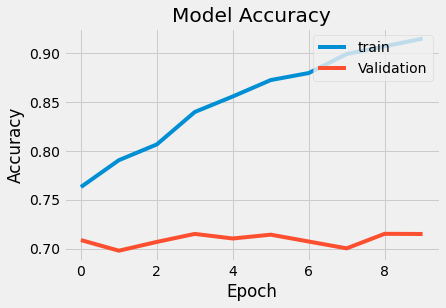

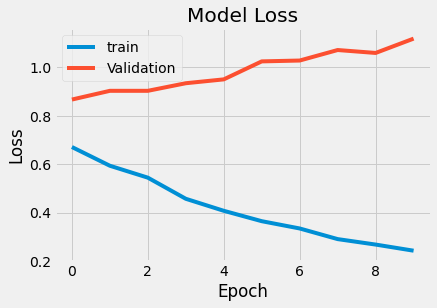

In [40]:
model.evaluate(x_test, y_test_one_hot)[1]
#Visulatize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'], loc='upper right')
plt.show()

#Visulatize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()

STEP 7 - make predictions (CAR, FROG)

[8, 0, 9, 1, 3, 2, 4, 6, 5, 7]
ship : 62.08 %
plane : 37.03 %
truck : 0.55 %
car : 0.19 %
cat : 0.08 %


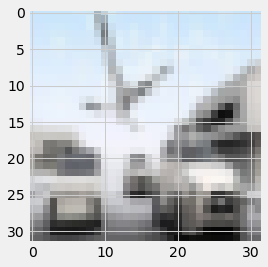

In [51]:
from google.colab import files
#uploaded = files.upload() # Only need to do this at new file upload

#show the image
new_image = plt.imread('car_test_image.jpg')
img = plt.imshow(new_image)

#resize the image to 32 x 32 (like our dataset)
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)
# making predictions
prediction = model.predict(np.array([resized_image]))
#show predictions
prediction
#Sort predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range (10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp


#Show sorted labes in order
print(list_index)

#Show the classifcation (for the 1st 5 predictions)
for i in range(5):
  print (label_names[list_index[i]],':',round(prediction[0][list_index[i]]*100,2),'%')

In [ ]:
#show the image
new_image = plt.imread('frog_test.jpg')
img = plt.imshow(new_image)

#resize the image to 32 x 32 (like our dataset)
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)
# making predictions
prediction = model.predict(np.array([resized_image]))
#show predictions
prediction
#Sort predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range (10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp


#Show sorted labes in order
print(list_index)

#Show the classifcation (for the 1st 5 predictions)
for i in range(5):
  print (label_names[list_index[i]],':',round(prediction[0][list_index[i]]*100,2),'%')

# Using Dynamic Image Classification
#### Tensor Object Dection - YOLO technology.

#***Image Processing in Python***
Article reference link: https://www.analyticsvidhya.com/blog/2014/12/image-processing-python-basics/ 

In [ ]:
!pip install -U scikit-image
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread

In [ ]:
example_file = drive.CreateFile({'id':'1zW9fLbL7e4RleXKluSzHVHZxupzgh4su'})
example_file.GetContentFile('skyimg1.png')
#example_file = glob.glob(r"C:UsersTavishDesktopwint_sky.gif")[0]
im = imread(example_file, as_grey=True)
plt.imshow(im, cmap=cm.gray)
plt.show()